## Logistic Regression Model

# 1. Installations

In [223]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [224]:
# get titanic & test csv files as a DataFrame

#developmental data (train)
titanic_df = pd.read_csv(r"C:\Users\dell\ML project\Log_model\train.csv")

In [225]:
#cross validation data (hold-out testing)
test_df    = pd.read_csv(r"C:\Users\dell\ML project\Log_model\test.csv")

In [226]:
# preview developmental data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
# preview developmental data
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [228]:
####<span style="color:red">This text is red!</span>


<span style="color:red">Note: there is no target variable into test data (i.e. "Survival" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression.</span>


# 2. Data Quality & Missing Value Assessment

In [229]:
# check missing values in train data
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.1. Age - Missing Values

In [230]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((titanic_df['Age'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


##### ~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

In [231]:
titanic_df.shape[0:2]

(891, 12)

#### titanic_df.shape[0]  here the [0] corresponds to the first element of the tuple, which is rows and last element is number of columns
#### titanic_df.shape[0:1] here we try to get both rows and columns but as condition fails at 1, it cant give columns, so to get columns use [0:2]

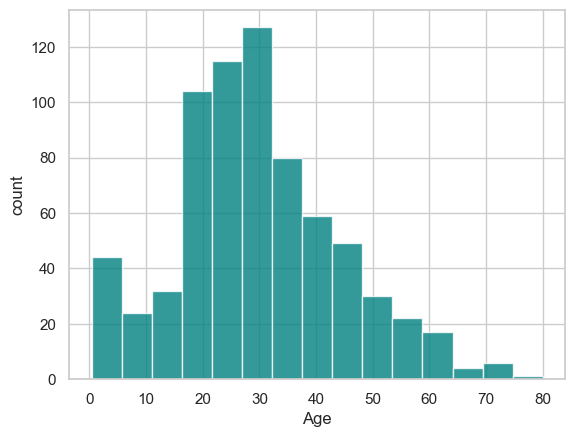

In [232]:
ax=titanic_df["Age"].hist(bins=15,color='teal', alpha=0.8)
ax.set(xlabel="Age", ylabel='count')
plt.show()


<span style="color:red">Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values. </span>

bins=15: This parameter specifies the number of bins or intervals into which the data range will be divided. In this case, the "Age" values will be grouped into 15 bins.

 density=True: This parameter, when set to True, normalizes the histogram such that the area under the histogram equals 1. It essentially transforms the histogram into a probability density function, making it easier to compare distributions of different datasets.

stacked=True: This parameter, when set to True, stacks the histograms for multiple data series on top of each other. This is useful when you have multiple categories or groups within the same histogram and you want to compare their distributions.

color='teal': This parameter sets the color of the histogram bars. In this case, the color is set to teal.

alpha=0.6: This parameter controls the transparency of the histogram bars. It takes a value between 0 (completely transparent) and 1 (completely opaque). A lower alpha value, such as 0.6, makes the bars semi-transparent.


When dealing with a right-skewed distribution, the mean is influenced by extreme values or outliers in the higher end of the distribution. In such cases, using the mean to impute missing values might lead to biased results because it pulls the imputed values towards the higher end of the distribution. This is especially problematic when the goal is to represent a typical or central value for a variable, as the mean can be overly influenced by a few extremely high values.

The median, on the other hand, is a measure of central tendency that is not affected by extreme values. It represents the middle value of a dataset when it is sorted in ascending or descending order. Using the median to impute missing values is a more robust approach when dealing with skewed distributions because it is not sensitive to outliers.

In [233]:
# median age is 28 (as compared to mean which is ~30)
titanic_df["Age"].median(skipna=True)

28.0

.median(skipna=True): This calculates the median of the extracted "Age" column. The skipna=True parameter is set to skip any missing values (NaN) when computing the median. If there are missing values in the "Age" column, they will be excluded from the calculation.

# 2.2 Cabin - Missing Values 

In [234]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %d%%' %((titanic_df['Cabin'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Cabin" records is 77%


%d%%'  gives whole percentage
%2f%%' gives 2 decimals after 

77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

# 2.3. Embarked - Missing Values

In [235]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((titanic_df['Embarked'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_11812\1260776785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_df, palette='Set2')


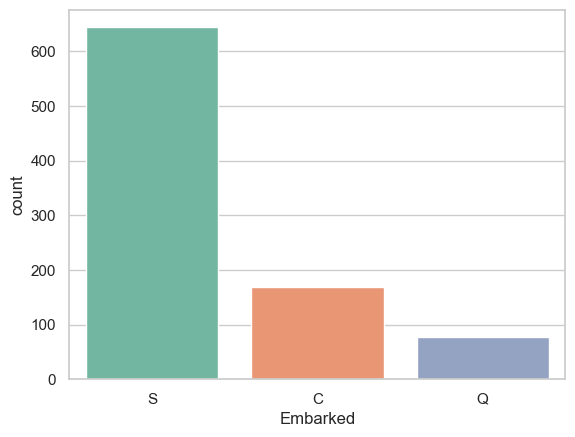

In [236]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic_df, palette='Set2')
plt.show()

.value_counts(): This method is applied to the 'Embarked' column and returns a Series containing counts of unique values. It effectively counts the occurrences of each unique value in the 'Embarked' column.
data=titanic_df: This specifies the DataFrame containing the data.
palette='Set2': This sets the color palette for the plot. 'Set2' is one of the predefined Seaborn color palettes.

By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

# 2.4. Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age).
If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [237]:
train_data = titanic_df.copy()
train_data["Age"].fillna(titanic_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(titanic_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

the key difference lies in whether you want an independent copy of the DataFrame (titanic_df.copy()) or if you want both variables to reference the same DataFrame (train_data = titanic_df). The shallow copy is often preferred when you want to modify one DataFrame without affecting the other.

titanic_df["Age"].median(skipna=True): This calculates the median of the "Age" column in the original DataFrame titanic_df. The skipna=True argument is used to exclude any missing values when computing the median.

train_data["Age"].fillna(...): This fills missing values in the "Age" column of the DataFrame train_data with the median value calculated from titanic_df. The fillna method is used for this purpose.

inplace=True: This parameter is set to True to apply the changes directly to the train_data DataFrame, without the need for reassignment. If inplace is set to False or omitted, a new DataFrame with the filled values would be returned, and you would need to assign it back to train_data.

train_data.drop('Cabin', axis=1): This part of the code is using the drop method to remove the "Cabin" column from the DataFrame train_data. The axis=1 parameter specifies that the operation is along the columns (as opposed to along rows, which would be axis=0).

In [238]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [239]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


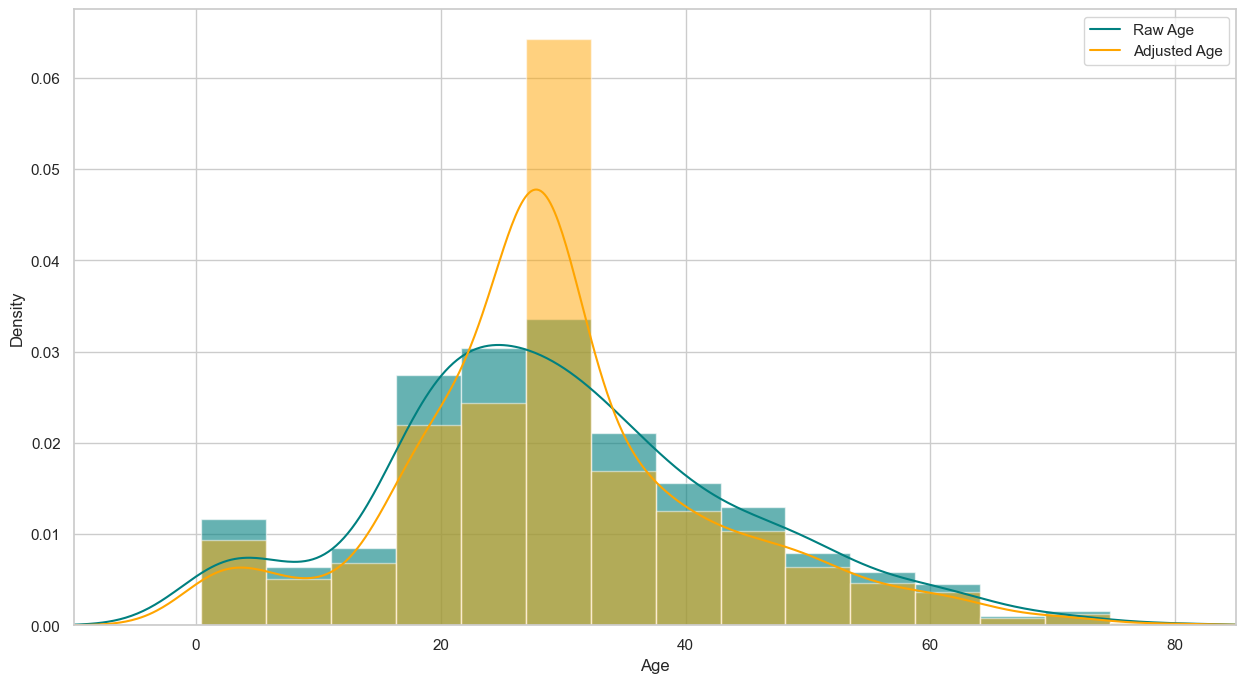

In [273]:
plt.figure(figsize=(15,8))
ax = titanic_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
plt.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# 2.4.1. Additional Variables

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [241]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked").

In [242]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


training.drop('Sex_female', axis=1, inplace=True), removed the female rows in the column sex

Now, apply the same changes to the test data.
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).
I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis.
There were no missing values in the "Embarked" port variable.
I'll add the dummy variables to finalize the test set.
Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [243]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [244]:
#first lets check the percentage of the missing values
print('Percent of missing "Age" records is %.2f%%' %((titanic_df['Age'].isnull().sum()/titanic_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


For numerical values, you can use different placeholders:

%d for integers
%f for floating-point numbers
%s for strings
Here's an example using %d for an integer:

python
Copy code
count = 42
formatted_string = 'The count is %d' % count

%.2f: This is a format specification for a floating-point number. Let's break down its components:

%: This is the string formatting operator indicating that a value will be inserted into the string.
.2f: This part specifies the format of the inserted value.
f: It stands for "float" and indicates that the value should be formatted as a floating-point number.
.2: This specifies the number of decimal places to display. In this case, it's set to 2, meaning the floating-point number will be displayed with two decimal places.
%%: This is an additional % sign. The double %% is used to include a literal % sign in the output string. The first % is an escape character, and the second % is the actual percentage sign you want to include in the output.

In [245]:
print('Percent of missing "Age" records is %d%%' % ((test_df['Age'].isnull().sum() / test_df.shape[0]) * 100))


Percent of missing "Age" records is 20%


In [246]:
round(test_df['Age'].mean())


30

In [247]:
test_df['Age'].median(skipna=True)

27.0

as the mean seems bigger and seems like it is getting affected by the bigger/older age groups, so using mean can move the mean too left side, as our distribution of age is more towards right skewed

In [248]:
test_data=test_df.copy()

just copying out main df into test_data, and play with this, so the main df will still be there

In [249]:
test_data['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)


here skipna=true, skips all na values in the test_df before calculating median, and inplace = true allows the changes simultaneously in to the test_data, fillna fills whatever value we get in the median calculation

In [250]:
test_df['Cabin'].isnull().sum()/test_df['Cabin'].shape[0]*100

78.22966507177034

as the percentage of missing values in case of Cabin is high so we should remove this variable for better prediction

In [251]:
test_data.drop('Cabin', axis=1, inplace=True)
# here drop function is used to drop the column, axis=1 specifies the column, inplace to do the version control

In [252]:
test_df['Fare'].isnull().sum()

1

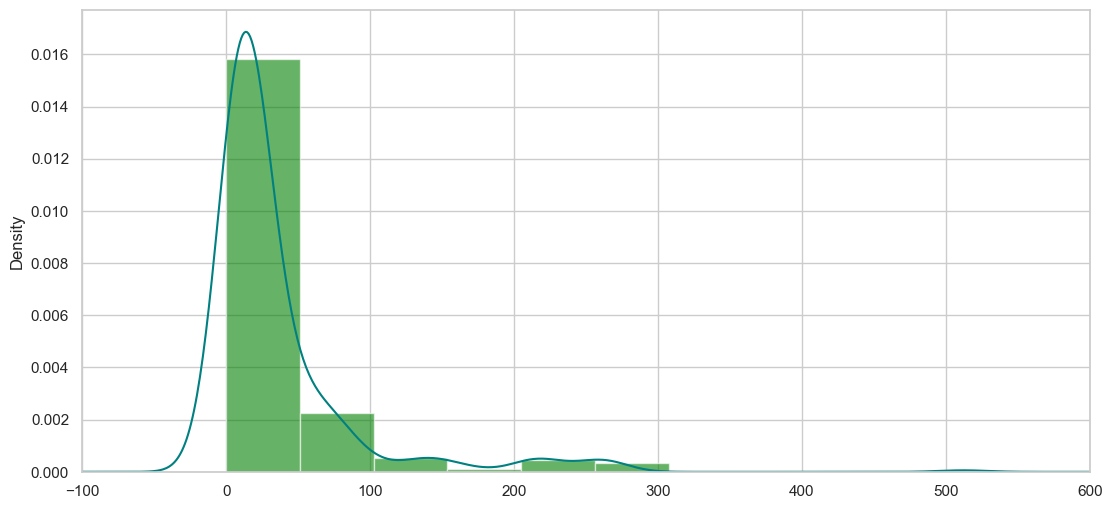

In [253]:
plt.figure(figsize=(13,6))
ax=test_df['Fare'].hist(bins=10, density=True, color='green', alpha=0.6)
test_df['Fare'].plot(kind='density', color='teal')
plt.xlim(-100, 600)
plt.show()

as it is righ skewed again so lets use the median to fill the null value

In [254]:
test_data['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)

In [255]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

puling just travel alone people and creating dummies for other variables 

In [256]:
test_data['Travelalone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)


In [257]:
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch',axis=1, inplace=True)


In [258]:
test_data.drop('PassengerId',axis=1, inplace=True)

In [259]:
test_data.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Travelalone
0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [260]:
test_data=pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
test_data.drop('Sex_female', axis=1, inplace=True)

In [261]:
test_data.head()

,Name,Age,Ticket,Fare,Travelalone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,"Kelly, Mr. James",34.5,330911,7.8292,1,False,False,True,False,True,False,True
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,False,False,True,False,False,True,False
2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,False,True,False,False,True,False,True
3,"Wirz, Mr. Albert",27.0,315154,8.6625,1,False,False,True,False,False,True,True
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,False,False,True,False,False,True,False


In [264]:
test_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = test_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)


In [266]:
test_data[['Pclass_1', 'Pclass_2', 'Pclass_3']] = test_data[['Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)

In [268]:
test_data[['Sex_male']] = test_data[['Sex_male']].astype(int)

In [269]:
test_data.head()

,Name,Age,Ticket,Fare,Travelalone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,"Kelly, Mr. James",34.5,330911,7.8292,1,0,0,1,0,1,0,1
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,0,1,0,0,1,0
2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,0,1,0,0,1,0,1
3,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,0,1,0,0,1,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,0,1,0,0,1,0


# 3. Exploratory Data Analysis 

This kind of exploratory data analysis is crucial for understanding the relationships between variables and identifying features that may be important for predicting the target variable (in this case, survival).

3.1 Exploration of Age 

now lets explore the each variBLE wise with outcome variable

C:\Users\dell\AppData\Local\Temp\ipykernel_11812\3797196310.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(final_train['Age'][final_train.Survived==1], color='darkturquoise', shade=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_11812\3797196310.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train['Age'] [final_train.Survived==0], color='lightcoral', shade=True)


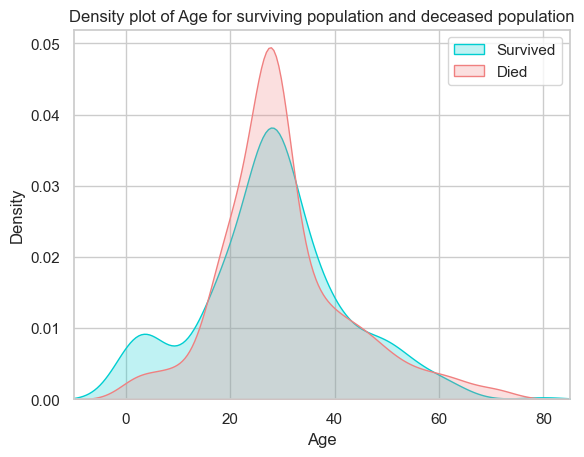

In [281]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train['Age'][final_train.Survived==1], color='darkturquoise', shade=True)
sns.kdeplot(final_train['Age'] [final_train.Survived==0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density plot of Age for surviving population and deceased population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

In [ ]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

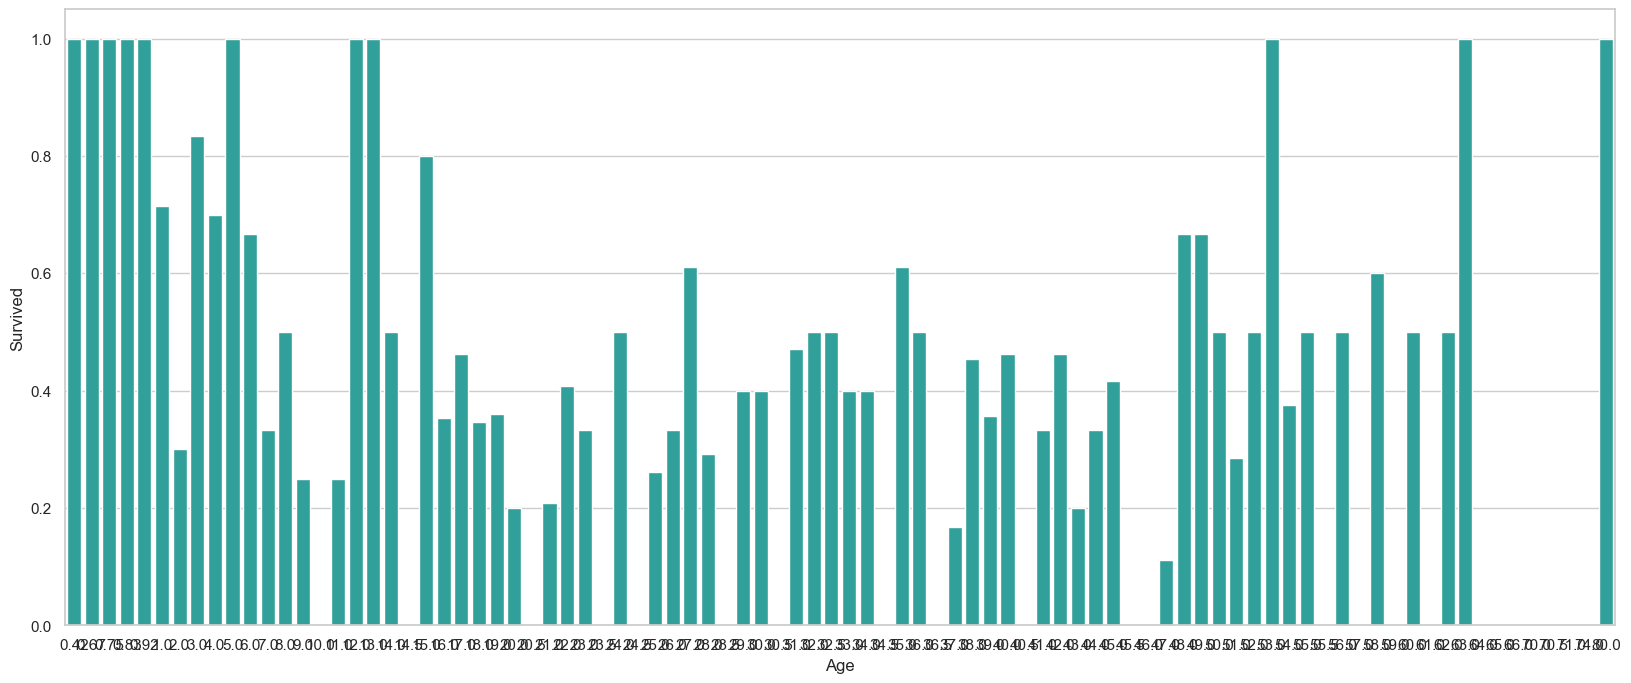

In [284]:
plt.figure(figsize=(20,8))
avg_survival_byage=final_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color='LightSeaGreen')
plt.show()

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [289]:
final_train['IsMinor']=np.where(final_train.Age<=16,1,0)
test_data['IsMionor']=np.where(test_data.Age<=16,1,0)

3.2 Exploration of Fare

C:\Users\dell\AppData\Local\Temp\ipykernel_11812\4068214424.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_11812\4068214424.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)


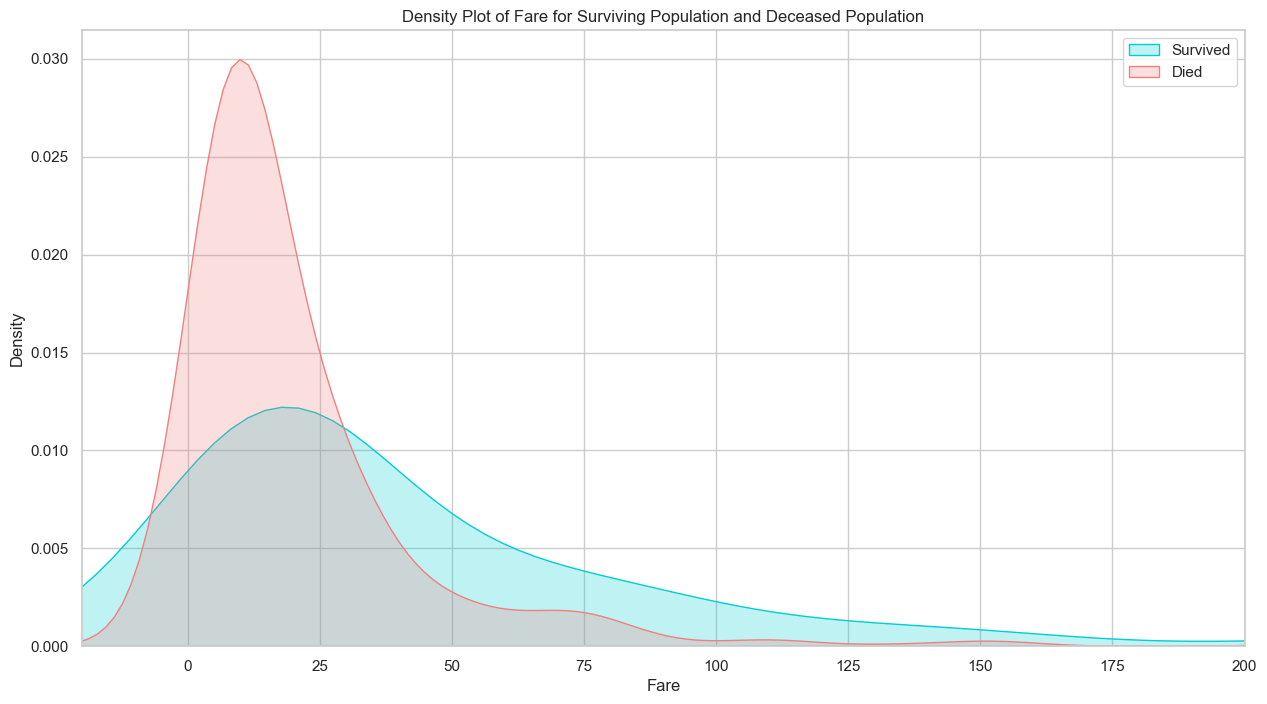

In [295]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

3.3. Exploration of Passenger Class

In [297]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

NameError: name 'train_df' is not defined

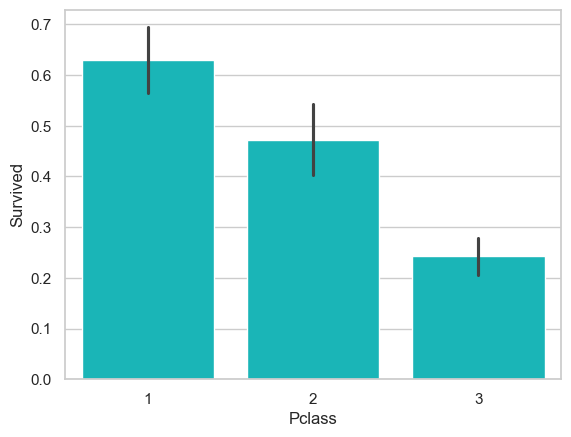

In [301]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, color='darkturquoise')
plt.show()

here we used titanic_df, which is the first dataframe, as the last refined and created dataset will have Pclass dummy variables created so as we didnt change the Pclass initially too, like didnt added any empty cells, so using the first df to check the EDA

Unsurprisingly, being a first class passenger was safest.

3.4. Exploration of Embarked Port

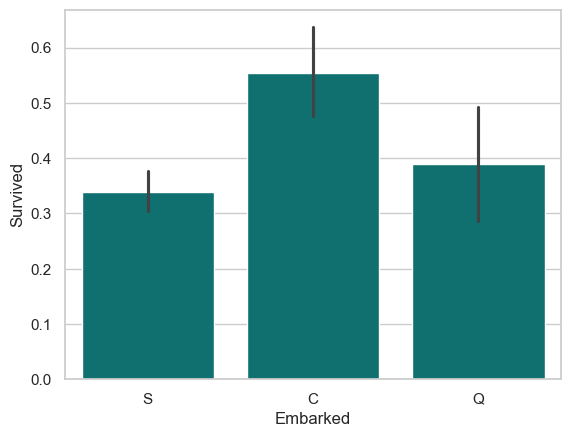

In [308]:
sns.barplot(x='Embarked', y='Survived', data=train_data, color='teal')
plt.show()

for some reason "sns.barplot('Embarked', 'Survived', data=train_data, color='teal')" this code is not working, that is the reason why i used x and y in this code

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

when interpreting the size of whiskers in a bar plot, consider them as a visual representation of the confidence or uncertainty around the calculated averages. Short whiskers imply higher confidence and precision, while long whiskers imply lower confidence and higher variability. Overlapping or non-overlapping whiskers provide insights into the statistical significance of differences between groups.

Overlapping whiskers in a bar plot typically suggest that there may not be a statistically significant difference between the groups being compared

3.5. Exploration of Traveling Alone vs. With Family

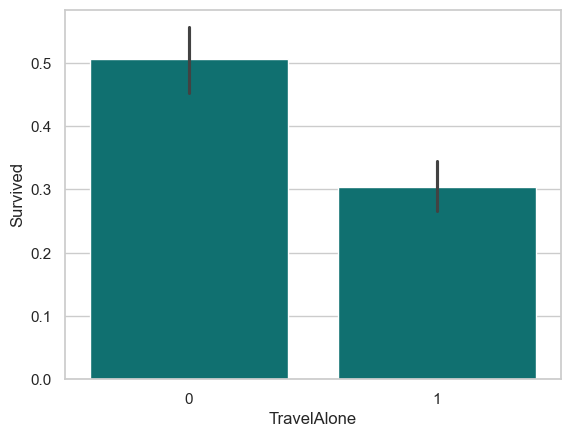

In [310]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color='teal')
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

3.6. Exploration of Gender Variable

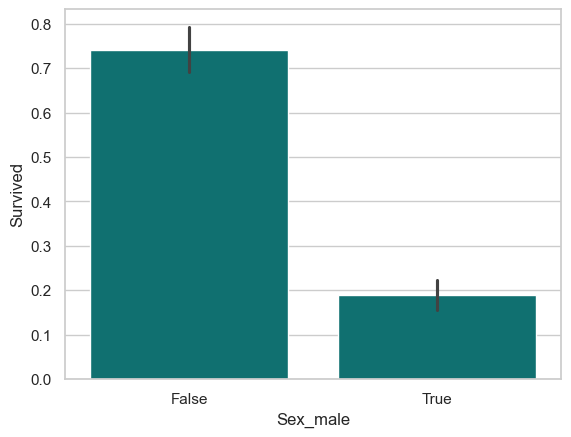

In [311]:
sns.barplot(x='Sex_male', y='Survived', data=final_train, color='teal')
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

# 4. Logistic Regression and Results

4.1. Feature selection

4.1.1. Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [316]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


c:\Users\dell\ML project\Log_model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
